In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
# load plotly
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('classic')

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1

%load_ext autoreload
%autoreload 2
%matplotlib inline

def pct_error(actual, forecast):
    return (actual - forecast)/actual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
df = pd.read_csv('data/routput_first_second_third.csv')
# split at ":" and join with "-"
df['Date'] = pd.to_datetime(df['Date'].str.split(':').str.join('-'))
df = df.set_index('Date')
df.head()

,First,Second,Third,Most_Recent
Date,,,,
1965-07-01,5.221,5.636,5.636,9.192
1965-10-01,5.799,7.649,7.649,9.535
1966-01-01,6.159,6.025,6.025,10.100
1966-04-01,2.331,1.887,1.887,1.377
1966-07-01,4.551,3.654,3.654,3.434


In [78]:
df['MAR'] = (df['First'] - df['Most_Recent']).abs()

# negative first & negative Most_Recent
both_neg = df[(df.First < 0) & (df.Most_Recent <0) & (df.First > df.Most_Recent)]
# print histogram of MARs
count, division = np.histogram(both_neg['MAR'])
bins = [f"{x:.2f}-{y:.2f}" for x, y in zip(division[:-1], division[1:])]
# create dataframe from bins and count
df_hist = pd.DataFrame({'MAR': bins, 'count': count})
df_hist

,MAR,count
0,0.10-0.55,2
1,0.55-1.01,2
2,1.01-1.46,3
3,1.46-1.92,2
4,1.92-2.37,1
5,2.37-2.83,0
6,2.83-3.28,0
7,3.28-3.74,0
8,3.74-4.19,0
9,4.19-4.65,1


(0.0, 4.0)

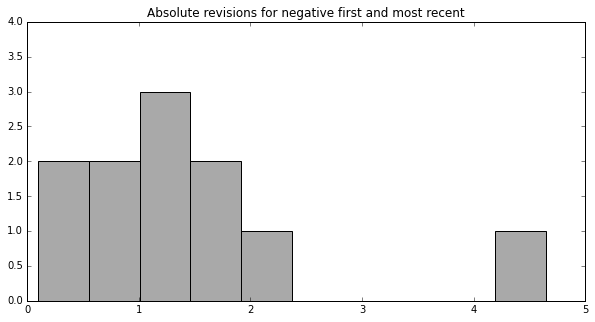

In [92]:
# set fig size
plt.figure(figsize=(10,5))
plt.hist(both_neg['MAR'], color='darkgrey')
plt.title('Absolute revisions for negative first and most recent')
# set y-axis limit to 12
plt.ylim(0,4)

In [85]:
both_neg.MAR.max()

4.648

How many quarters there were where first real GDP estimate was >0, but the most recent was <0?

In [91]:
df[['First', 'Second', 'Third', 'Most_Recent']][(df.First > 0) & (df.Most_Recent < 0)].reset_index()

,Date,First,Second,Third,Most_Recent
0,1973-07-01,3.546,3.399,3.399,-2.093
1,1980-07-01,0.998,0.883,2.372,-0.471
2,1982-07-01,0.760,0.000,0.733,-1.526
3,2001-01-01,1.982,1.318,1.245,-1.291
4,2008-01-01,0.597,0.901,0.959,-1.619
5,2011-01-01,1.748,1.842,1.915,-0.961
6,2011-07-01,2.464,2.004,1.815,-0.154
7,2014-01-01,0.108,-0.985,-2.930,-1.395
